## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [3]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [4]:
df_train = pd.read_csv("Titanic_train.csv")
df_test=pd.read_csv('Titanic_test.csv')

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


In [7]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [10]:
def outliers_z_score(data,times):
    mean = np.mean(data)
    stdev = np.std(data)
    z_scores = [(i - mean) / stdev for i in data]
    return np.where(np.abs(z_scores) > times)

In [11]:
outliers_z_score(df_train['Fare'],3)

(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
        689, 700, 716, 730, 737, 742, 779], dtype=int64),)

## 方法3-盒鬚圖判別法(IQR method)

In [12]:
def outliers_iqr(data, times):
    Q1, Q3 = np.nanpercentile(data, [25, 75])
    iqr = Q3 - Q1
    lower_bound = Q1 - (iqr * times)
    upper_bound = Q3 + (iqr * times)
    return np.where((data > upper_bound) | (data < lower_bound))

In [13]:
outliers_iqr(df_train['Fare'],1.5)

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
       dtype=int64),)

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


{'whiskers': [<matplotlib.lines.Line2D at 0x1c5977522c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c597772ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c59776be88>],
 'medians': [<matplotlib.lines.Line2D at 0x1c597779f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c597779a88>],
 'means': []}

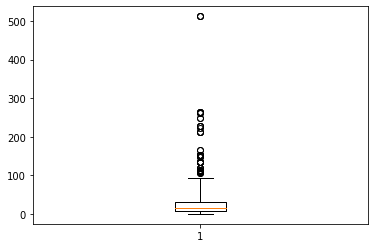

In [19]:
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=3)

In [ ]:
'''
偽異常，無需處理
'''